# Q1
## Code


In [4]:
#importing relevant libraries/modules
import matplotlib.pyplot as plt #imported for generating plots
import pandas as pd #...manipulating tables
import numpy as np #...vector/array operations
from sklearn.linear_model import LogisticRegression #...calculating metrics to evaluate performance
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [5]:
def data_loader():
    df = pd.read_csv(r'C:\Users\anshm\OneDrive\Desktop\Uni Work\pol\Anj.csv')
    #print(df.head())
    X=df.iloc[:,1:-1].to_numpy()
    y=df.loc[:,'Class'].to_numpy()
    XTrain, XTest, yTrain, yTest= train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) #spliting the data into training (70% of data) and testing (30% of data) subsets
    ss = StandardScaler()
    XTrain = ss.fit_transform(XTrain)
    XTest = ss.fit_transform(XTest)
    return XTrain, XTest, yTrain, yTest, X, y

XTrain, XTest, yTrain, yTest, X, y= data_loader()

In [68]:
y_counts = np.unique(yTrain, return_counts=True)
print(y_counts[0], y_counts[1])


[0 1] [199020    344]


In [82]:
def metrix(yTest, yPredict, predictions, prob):
    
    if prob==False:
        print("")
        
    else:
        ns_probs = [0 for _ in range(len(yTest))] #creating a baseline with no discriminatory power "no information classifier" 
        ns_fpr, ns_tpr, _ = roc_curve(yTest, ns_probs) #calculating true and false positive rates 
        lr_fpr, lr_tpr, thresholds = roc_curve(yTest, predictions.reshape(-1, 1))#defining classification thresholds

        plt.figure()
        plt.plot(lr_fpr, lr_tpr)
        plt.plot(ns_fpr, ns_tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()#plotting the ROC curve and no information classifier

        lr_auc = roc_auc_score(yTest, predictions)
        print("lr_auc:",lr_auc)#area under ROC curve

        optimal_idx = np.argmax(lr_tpr - lr_fpr) #computing optimal threshold through maximising true positive rate and minimising false positive rate
        optimal_threshold = thresholds[optimal_idx] 
        print("optimal_threshold:",optimal_threshold)
    
    cf=confusion_matrix(yTest, yPredict)
    print(cf)
    print("Accuracy:",accuracy_score(yTest, yPredict))
    
    
    print("F1 Score(Macro):",f1_score(yTest, yPredict, average='macro'))
    print("F1 Score(Binary):",f1_score(yTest, yPredict))
    
    print("Recall(Sensitivity):", recall_score(yTest, yPredict))
    
    print("Precision Score:", precision_score(yTest, yPredict))
    
    
    print("specificity:",cf[0,0]/(cf[0,0]+cf[0,1]))
    print("FPR:",1-(cf[0,0]/(cf[0,0]+cf[0,1]))) 

In [74]:
logisticRegr = LogisticRegression(max_iter=2000, n_jobs=-1)#instantiating model object 
logisticRegr.fit(XTrain, yTrain)# fitting the model object onto our training set
yPredictlog=logisticRegr.predict(XTest)# outputing the predicitons of the model when inputting the test set
predictions = logisticRegr.predict_proba(XTest)[:, 1]#probability of getting a 1 i.e. default 

In [4]:
#importance=logisticRegr.coef_[0]
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))

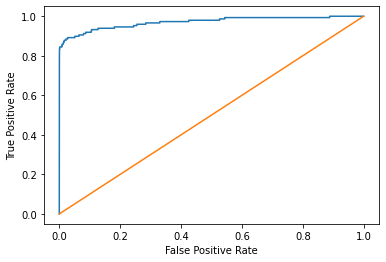

lr_auc: 0.9700719125831969
optimal_threshold: 0.0019764380554000284
[[85281    14]
 [   58    90]]
Accuracy: 0.9991573329588147
F1 Score(Macro): 0.856931879260372
F1 Score(Binary): 0.7142857142857144
Recall(Sensitivity): 0.6081081081081081
Precision Score: 0.8653846153846154
specificity: 0.9998358637669266
FPR: 0.00016413623307343084


In [83]:
metrix(yTest,yPredictlog, predictions, prob=True)

# Q2

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0,oob_score=True)
rfc.fit(XTrain,yTrain)
yPredictrfc=rfc.predict(XTest)


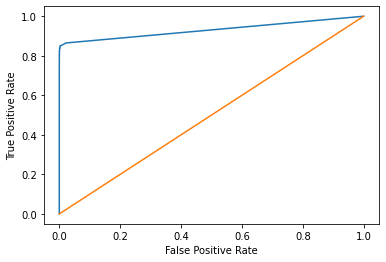

lr_auc: 0.9306901484989298
optimal_threshold: 0.03
[[85290     5]
 [   42   106]]
Accuracy: 0.9994499256814484
F1 Score(Macro): 0.9091286819430665
F1 Score(Binary): 0.8185328185328186
Recall(Sensitivity): 0.7162162162162162
Precision Score: 0.954954954954955
specificity: 0.9999413799167595
FPR: 5.8620083240534804e-05


In [85]:

#ax = plt.gca()
#rfc_disp = RocCurveDisplay.from_estimator(rfc, XTest, yTest, ax=ax, alpha=1)
#plt.show()
metrix(yTest, yPredictrfc, predictions = rfc.predict_proba(XTest)[:, 1], prob=True)


In [79]:
predictions_proba=rfc.predict_proba(XTest)
predictionsrfc =rfc.predict(XTest)
lr_auc = roc_auc_score(yTest, predictionsrfc)
print(lr_auc)

0.8580787980664878


In [80]:
from sklearn import tree
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

[Text(136.67531955825078, 213.69103448275862, 'X[3] <= 3.745\ngini = 0.003\nsamples = 125972\nvalue = [199017, 347]'),
 Text(56.52687778029395, 206.19310344827585, 'X[11] <= -4.573\ngini = 0.002\nsamples = 125740\nvalue = [198797, 219]'),
 Text(25.064959600900984, 198.6951724137931, 'X[22] <= 0.297\ngini = 0.348\nsamples = 78\nvalue = [26, 90]'),
 Text(17.692912659459516, 191.19724137931036, 'X[4] <= -0.06\ngini = 0.426\nsamples = 50\nvalue = [24, 54]'),
 Text(11.795275106306345, 183.69931034482758, 'X[22] <= -0.458\ngini = 0.334\nsamples = 41\nvalue = [14, 52]'),
 Text(8.846456329729758, 176.20137931034483, 'gini = 0.0\nsamples = 14\nvalue = [0, 27]'),
 Text(14.744093882882932, 176.20137931034483, 'X[27] <= 0.854\ngini = 0.46\nsamples = 27\nvalue = [14, 25]'),
 Text(8.846456329729758, 168.70344827586206, 'X[14] <= -1.148\ngini = 0.111\nsamples = 13\nvalue = [1, 16]'),
 Text(5.897637553153173, 161.2055172413793, 'X[1] <= 2.191\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(2.9488187

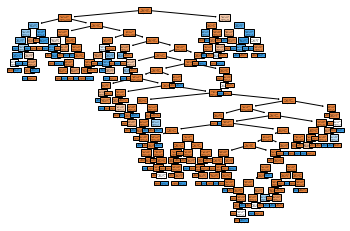

In [61]:
plt.figure()
tree.plot_tree(rfc.estimators_[1], filled=True)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 700, stop = 1000, num = 5)]
max_depth = [int(x) for x in np.linspace(60, 80 ,num = 6)]
max_depth.append(None)
min_samples_split = [5]
min_samples_leaf = [1,2] 
nara=RandomForestClassifier(n_jobs = -1, random_state=0)
hyperparam = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rfc_random = RandomizedSearchCV(estimator = nara ,param_distributions= hyperparam, verbose=1,cv=3, random_state=0, n_jobs = -1)
rfc_random.fit(XTrain, yTrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [60, 64, 68, 72, 76, 80,
                                                      None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [5],
                                        'n_estimators': [700, 775, 850, 925,
                                                         1000]},
                   random_state=0, verbose=1)

In [65]:
print(hyperparam)

{'n_estimators': [700, 775, 850, 925, 1000], 'max_depth': [60, 64, 68, 72, 76, 80, None], 'min_samples_split': [5], 'min_samples_leaf': [1, 2]}


In [25]:
rfc2=RandomForestClassifier(n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_depth= 40, random_state=0, n_jobs=-1)
rfc2.fit(XTrain,yTrain)




[[85289     6]
 [   40   108]]
Accuracy: 0.9994616293903538
F1 Score(Macro): 0.912078941133184
F1 Score(Binary): 0.8244274809160306
Recall(Sensitivity): 0.7297297297297297
Precision Score: 0.9473684210526315
specificity: 0.7297297297297297
FPR: 0.2702702702702703


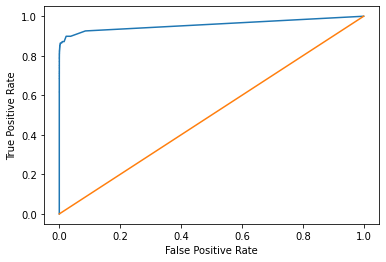

lr_auc: 0.9573151922659514
optimal_threshold: 0.00375
[[85289     6]
 [   40   108]]
Accuracy: 0.9994616293903538
F1 Score(Macro): 0.912078941133184
F1 Score(Binary): 0.8244274809160306
Recall(Sensitivity): 0.7297297297297297
Precision Score: 0.9473684210526315
specificity: 0.9999296559001114
FPR: 7.034409988859736e-05


In [86]:
metrix(yTest, yPredict=rfc2.predict(XTest), predictions = rfc2.predict_proba(XTest)[:, 1], prob=True)

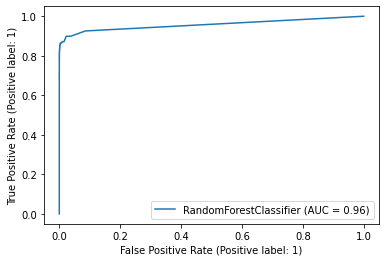

In [46]:
#ax = plt.gca()
#rfc_disp = RocCurveDisplay.from_estimator(rfc2, XTest, yTest, ax=ax, alpha=1)
#plt.show()

[Text(136.67531955825078, 213.69103448275862, 'X[3] <= 3.745\ngini = 0.003\nsamples = 125972\nvalue = [199017, 347]'),
 Text(56.52687778029395, 206.19310344827585, 'X[11] <= -4.573\ngini = 0.002\nsamples = 125740\nvalue = [198797, 219]'),
 Text(25.064959600900984, 198.6951724137931, 'X[22] <= 0.297\ngini = 0.348\nsamples = 78\nvalue = [26, 90]'),
 Text(17.692912659459516, 191.19724137931036, 'X[4] <= -0.06\ngini = 0.426\nsamples = 50\nvalue = [24, 54]'),
 Text(11.795275106306345, 183.69931034482758, 'X[22] <= -0.458\ngini = 0.334\nsamples = 41\nvalue = [14, 52]'),
 Text(8.846456329729758, 176.20137931034483, 'gini = 0.0\nsamples = 14\nvalue = [0, 27]'),
 Text(14.744093882882932, 176.20137931034483, 'X[27] <= 0.854\ngini = 0.46\nsamples = 27\nvalue = [14, 25]'),
 Text(8.846456329729758, 168.70344827586206, 'X[14] <= -1.148\ngini = 0.111\nsamples = 13\nvalue = [1, 16]'),
 Text(5.897637553153173, 161.2055172413793, 'X[1] <= 2.191\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(2.9488187

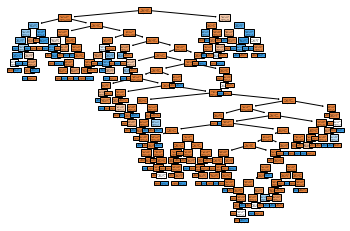

In [69]:
plt.figure()
tree.plot_tree(rfc2.estimators_[1], filled=True)

# Q3

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(XTrain, yTrain)
yPredict = svm.predict(XTest)

In [111]:
metrix(yTest, yPredict, predictions, prob=False)


[[85282    13]
 [   65    83]]
Accuracy: 0.9990871107053826
F1 Score(Macro): 0.8399353857688063
F1 Score(Binary): 0.680327868852459
Recall(Sensitivity): 0.5608108108108109
Precision Score: 0.8645833333333334
specificity: 0.9998475877835746
FPR: 0.00015241221642536829


C:\Users\anshm\OneDrive\Documents\CONDA\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


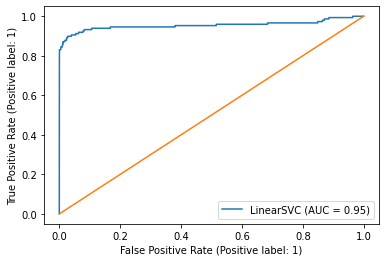

In [128]:
from sklearn.metrics import plot_roc_curve
ns_probs = [0 for _ in range(len(yTest))]
svc_disp = plot_roc_curve(svc,XTest,yTest)
ns_fpr, ns_tpr, _ = roc_curve(yTest,ns_probs)
plt.plot(ns_fpr, ns_tpr)

plt.show()

# 3.5

In [119]:
from sklearn.model_selection import GridSearchCV
max_iter_list = [1000, 1500, 2000, 2500, 3000]
svc_grid = LinearSVC(dual=False)
param_grid = {'C': [0.1, 1, 10, 100,400,700, 1000],
              'tol': [1, 0.1, 0.01, 0.001, 0.0001],
             'max_iter': max_iter_list}
grid = GridSearchCV(svc_grid, param_grid, refit = True, verbose = 0, n_jobs=-1)
grid.fit(XTrain, yTrain)

GridSearchCV(estimator=LinearSVC(dual=False), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 400, 700, 1000],
                         'max_iter': [1000, 1500, 2000, 2500, 3000],
                         'tol': [1, 0.1, 0.01, 0.001, 0.0001]})

In [121]:
grid.best_params_

{'C': 100, 'max_iter': 1000, 'tol': 0.001}

In [125]:
svc_grid_2=LinearSVC(C=100, tol=0.01, max_iter=1000, dual=False,)
svc_grid_2.fit(XTrain, yTrain)
yPredict=svc_grid_2.predict(XTest)
metrix(yTest, yPredict, predictions=[], prob=False)



[[85282    13]
 [   65    83]]
Accuracy: 0.9990871107053826
F1 Score(Macro): 0.8399353857688063
F1 Score(Binary): 0.680327868852459
Recall(Sensitivity): 0.5608108108108109
Precision Score: 0.8645833333333334
specificity: 0.9998475877835746
FPR: 0.00015241221642536829


In [28]:
from sklearn.model_selection import GridSearchCV
nara2=LinearSVC(dual=False)
max_iter_list = [1200 ,1500,1600, 1700, 1800]
param_grid2 = {'C': [0.1, 1, 10, 100, 1000],
              'tol': [0.0005, 0.001, 0.0015],
              'max_iter': max_iter_list}
rfc_random2 = GridSearchCV(estimator = nara2 ,grid= param_grid2, cv = 3, verbose=1, random_state=0, n_jobs = -1, scoring="f1")
rfc_random2.fit(XTrain[:25000,:], yTrain[:25000])
result2 = rfc_random2.fit(X, y)

TypeError: __init__() got an unexpected keyword argument 'grid'

In [43]:
rfc_random2.best_params_

{'tol': 0.001, 'max_iter': 1500, 'C': 0.1}

# Q4

284315 492


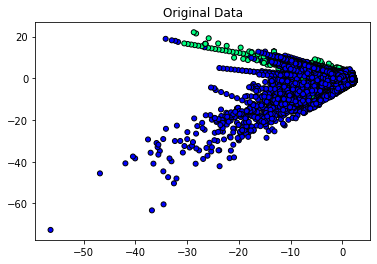

In [51]:
plt.close
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k", cmap="winter")
plt.title("Original Data")
bin_count(y)

(568627,)
(568627, 29)


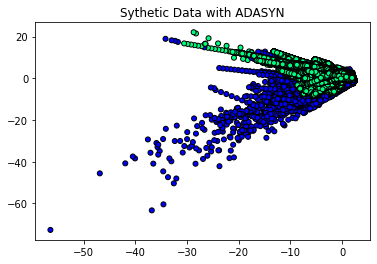

In [30]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=0,n_neighbors=8)
XAD, yAD = ada.fit_resample(X, y)
plt.figure()
plt.scatter(XAD[:, 0], XAD[:, 1], marker="o", c=yAD, s=25, edgecolor="k", cmap="winter")
plt.title("Sythetic Data with ADASYN")
print(yAD.shape)
print(XAD.shape)

In [99]:
XADTrain, XADTest, yADTrain, yADTest= train_test_split(XAD, yAD, test_size=0.3, random_state=0, stratify=yAD) #spliting the data into training (70% of data) and testing (30% of data) subsets
ss = StandardScaler()
XSMTrain = ss.fit_transform(XADTrain)
XSMTest = ss.fit_transform(XADTest)

In [100]:
logisticRegr = LogisticRegression(max_iter=2000, n_jobs=-1)
logisticRegr.fit(XADTrain, yADTrain)
yADPredictlog=logisticRegr.predict(XADTest)
predictions = logisticRegr.predict_proba(XADTest)[:, 1]

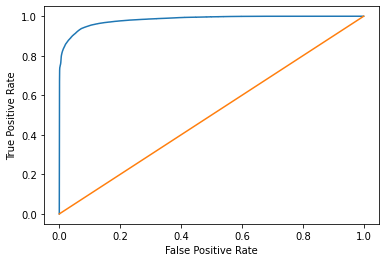

lr_auc: 0.9825401374137388
optimal_threshold: 0.36139904076298573
[[81524  3771]
 [ 8326 76968]]
Accuracy: 0.9290868696105845
F1 Score(Macro): 0.9290362519663202
F1 Score(Binary): 0.927140990044148
Recall(Sensitivity): 0.902384692944404
Precision Score: 0.953293947163081
specificity: 0.9557887332200011
FPR: 0.04421126677999887


In [101]:
metrix(yADTest, yADPredictlog, predictions, prob=True)


[[81858  3437]
 [ 9493 75801]]
Accuracy: 0.9242037880519846
F1 Score(Macro): 0.9241081108504104
F1 Score(Binary): 0.921413463642331
Recall(Sensitivity): 0.8887026051070416
Precision Score: 0.9566243469042631
specificity: 0.9597045547804678
FPR: 0.04029544521953221


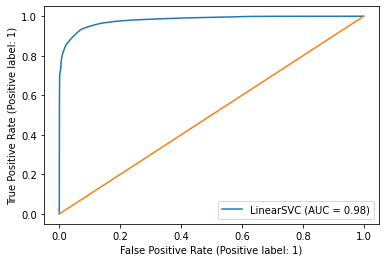

In [102]:
from sklearn.svm import LinearSVC
svcAD = LinearSVC(dual=False)
svcAD.fit(XADTrain, yADTrain)
yADPredict = svcAD.predict(XADTest)
metrix(yADTest, yADPredict, predictions=[], prob=False)
ns_probs = [0 for _ in range(len(yADTest))]
svc_disp = RocCurveDisplay.from_estimator(svcAD, XADTest, yADTest)
ns_fpr, ns_tpr, _ = roc_curve(yADTest, ns_probs)
plt.plot(ns_fpr, ns_tpr)
plt.show()

In [35]:
rfcAD=RandomForestClassifier(n_jobs=-1, random_state=0)
rfcAD.fit(XADTrain,yADTrain)
yADPredictrfc=rfcAD.predict(XADTest)


In [137]:
yADTest_counts = np.unique(yAD, return_counts=True)
print(yADTest_counts[0], yADTest_counts[1])

[0 1] [284315 284312]


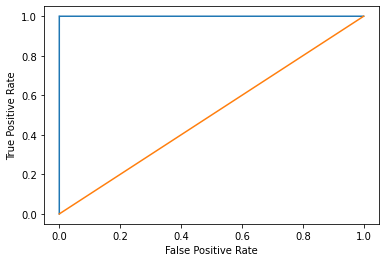

lr_auc: 0.9999990817373646
optimal_threshold: 0.67
[[85280    15]
 [    4 85290]]
Accuracy: 0.9998886211889395
F1 Score(Macro): 0.9998886211885567
F1 Score(Binary): 0.9998886277176302
Recall(Sensitivity): 0.9999531033835909
Precision Score: 0.9998241603657464
specificity: 0.9998241397502784
FPR: 0.0001758602497216044


In [103]:
#ax = plt.gca()
#rfc_disp = RocCurveDisplay.from_estimator(rfcAD, XADTest, yADTest, ax=ax, alpha=0.8)
#plt.show()
metrix(yADTest, yADPredictrfc, predictions=rfcAD.predict_proba(XADTest)[:, 1], prob=True)

In [106]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}